In [4]:
!pip install haversine

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from haversine import haversine, Unit

In [6]:
import os
os.chdir(r"C:\Users\lizzy\스파르타_파이썬\심화플젝")
print(os.getcwd())  # 잘 바뀌었는지 확인

C:\Users\lizzy\스파르타_파이썬\심화플젝


In [7]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

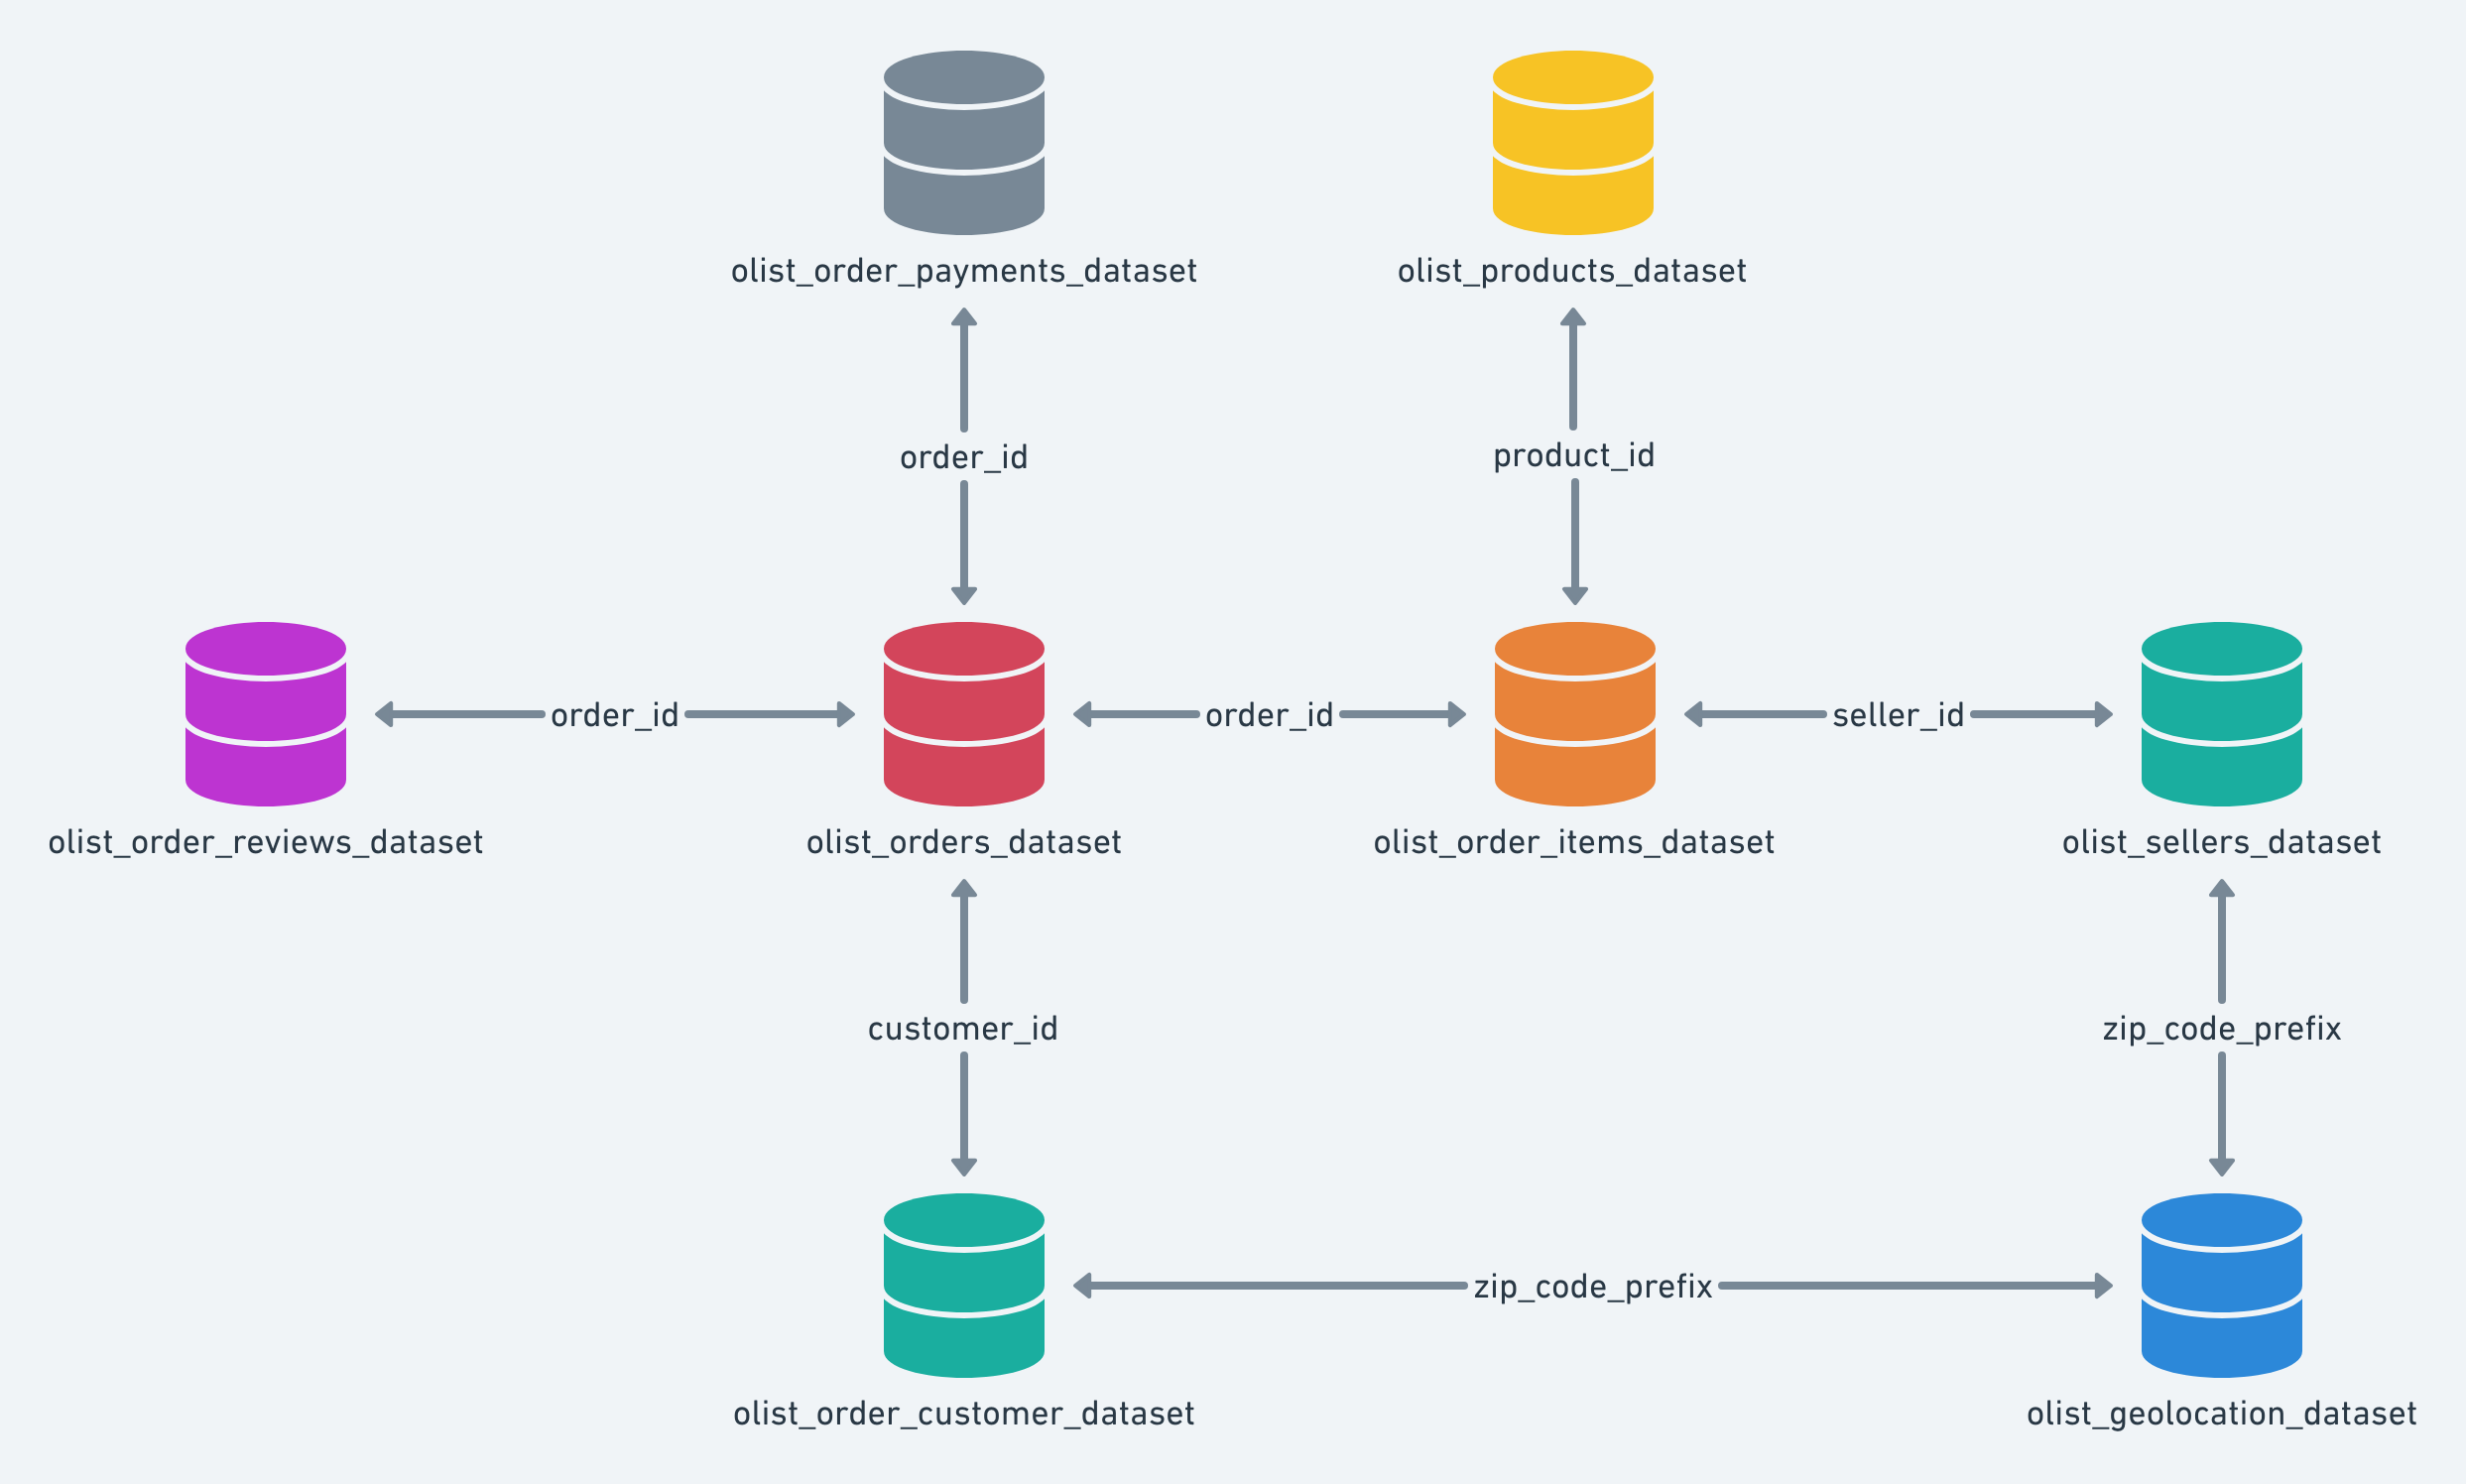

In [8]:
# order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,
# order_estimated_delivery_date, shipping_limit_date, price, freight_value, product_weight_g, product_length_cm,
# product_height_cm, product_width_cm, payment_installments, payment_value, geolocation_lat, geolocation_lng

df_total = pd.merge(orders, order_items, on='order_id', how='inner')
df_total = pd.merge(df_total, order_payments, on='order_id', how='inner')
df_total = pd.merge(df_total, order_reviews, on='order_id', how='inner')
df_total = pd.merge(df_total, customers, on='customer_id', how='inner')
df_total = pd.merge(df_total, products, on='product_id', how='inner')
df_total = pd.merge(df_total, product_category_name_translation, on='product_category_name', how='inner')
df_total = pd.merge(df_total, sellers, on='seller_id', how='inner')

In [9]:
df_total = df_total[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                     'order_estimated_delivery_date', 'shipping_limit_date', 'price', 'freight_value', 'product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm', 'payment_installments', 'payment_value']]

In [10]:
df_total

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_installments,payment_value
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1,18.12
1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1,2.00
2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1,18.59
3,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,118.70,22.76,400.0,19.0,13.0,19.0,1,141.46
4,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,159.90,19.22,420.0,24.0,19.0,21.0,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-12 13:10:37,174.90,20.10,4950.0,40.0,10.0,40.0,3,195.00
115605,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-05 15:04:16,205.99,65.02,13300.0,32.0,90.0,22.0,5,271.01
115606,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,6550.0,20.0,20.0,20.0,4,441.16
115607,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,6550.0,20.0,20.0,20.0,4,441.16


In [11]:
df_total.dropna(inplace=True)

In [12]:
# df_total['delivery_time'] = df_total['order_delivered_customer_date'] - df_total['order_purchase_timestamp']

df_total['order_delivered_customer_date'] = pd.to_datetime(df_total['order_delivered_customer_date'])
df_total['order_purchase_timestamp'] = pd.to_datetime(df_total['order_purchase_timestamp'])

df_total['delivered_dayofweek'] = df_total['order_delivered_customer_date'].dt.dayofweek
df_total['purchase_dayofweek'] = df_total['order_purchase_timestamp'].dt.dayofweek

In [13]:
df_total

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_installments,payment_value,delivered_dayofweek,purchase_dayofweek
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1,18.12,1,0
1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1,2.00,1,0
2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1,18.59,1,0
3,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,118.70,22.76,400.0,19.0,13.0,19.0,1,141.46,1,1
4,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,159.90,19.22,420.0,24.0,19.0,21.0,3,179.12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-12 13:10:37,174.90,20.10,4950.0,40.0,10.0,40.0,3,195.00,2,1
115605,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-05 15:04:16,205.99,65.02,13300.0,32.0,90.0,22.0,5,271.01,3,6
115606,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,6550.0,20.0,20.0,20.0,4,441.16,3,0
115607,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,6550.0,20.0,20.0,20.0,4,441.16,3,0


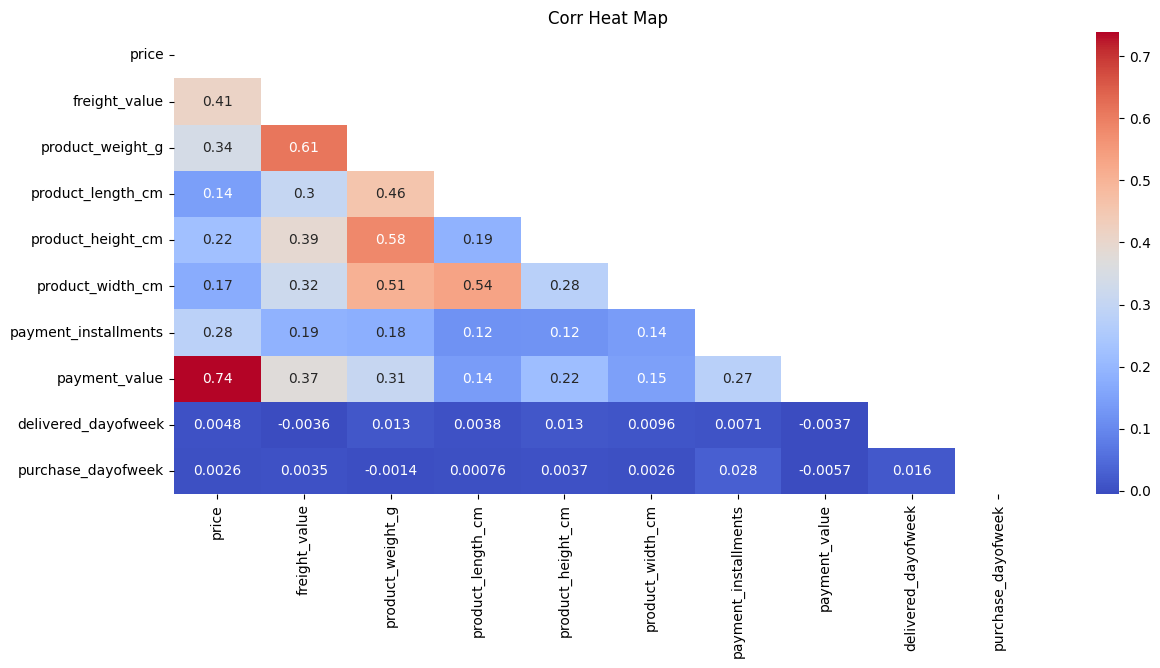

In [14]:
df_total_corr = df_total[['price', 'freight_value', 'product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm', 'payment_installments', 'payment_value', 'delivered_dayofweek', 'purchase_dayofweek']].corr()
mask = np.triu(np.ones_like(df_total_corr, dtype=bool))

plt.figure(figsize=(14, 6))
sns.heatmap(
    data = df_total_corr,
    annot = True,
    cmap = 'coolwarm',
    mask = mask
)
plt.title("Corr Heat Map")
plt.show()

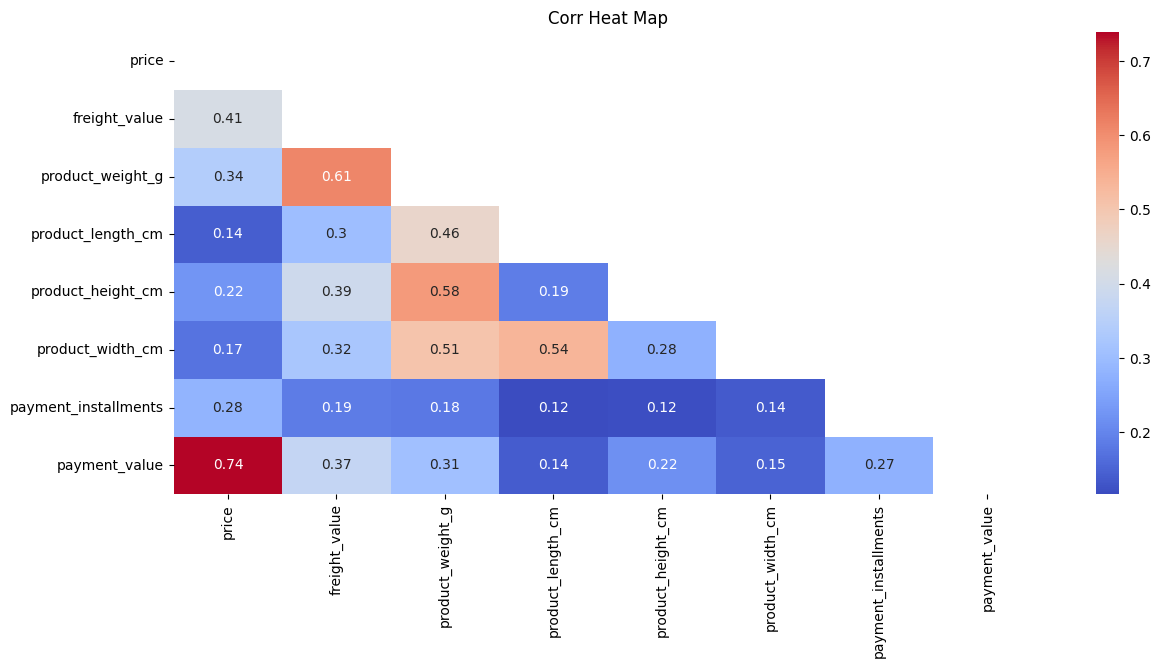

In [15]:
# 배송이 결제 이후에 진행되기 때문에 price보다 payment_value가 더 중요하다.
# price 컬럼은 예측 모델 개발 시 제외

df_total_corr = df_total[['price', 'freight_value', 'product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm', 'payment_installments', 'payment_value']].corr()
mask = np.triu(np.ones_like(df_total_corr, dtype=bool))

plt.figure(figsize=(14, 6))
sns.heatmap(
    data = df_total_corr,
    annot = True,
    cmap = 'coolwarm',
    mask = mask
)
plt.title("Corr Heat Map")
plt.show()

# 최종 데이터셋

In [16]:
# 주문자 주소 별 위도, 경도 평균
geo_group_mean = geolocation.groupby(['geolocation_zip_code_prefix'])[['geolocation_lat','geolocation_lng']].mean().reset_index()

In [17]:
df_total = pd.merge(orders, order_items, on='order_id', how='inner')
df_total = pd.merge(df_total, order_payments, on='order_id', how='inner')
df_total = pd.merge(df_total, customers, on='customer_id', how='inner')
df_total = pd.merge(df_total, products, on='product_id', how='inner')
df_total = pd.merge(df_total, sellers, on='seller_id', how='inner')

In [18]:
df_total = pd.merge(df_total,
                    geo_group_mean.rename(columns={
                        'geolocation_lat': 'customer_lat',
                        'geolocation_lng': 'customer_lng'
                    }),
                    how='left',
                    left_on='customer_zip_code_prefix',
                    right_on='geolocation_zip_code_prefix')
df_total.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

In [19]:
df_total = pd.merge(df_total,
                    geo_group_mean.rename(columns={
                        'geolocation_lat': 'seller_lat',
                        'geolocation_lng': 'seller_lng'
                    }),
                    how='left', # 마찬가지로 left merge
                    left_on='seller_zip_code_prefix',
                    right_on='geolocation_zip_code_prefix')
df_total.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

In [20]:
df_total['distance_customer_seller_km'] = df_total.apply(
    lambda row: haversine(
        (row['customer_lat'], row['customer_lng']), # 고객 위도 경도
        (row['seller_lat'], row['seller_lng']),     # 판매자 위도 경도
        unit=Unit.KILOMETERS
    )
    # 위도/경도 중 하나라도 NaN이면 거리도 NaN이 되도록 처리 (매우 중요!)
    if pd.notna(row['customer_lat']) and pd.notna(row['customer_lng']) and
       pd.notna(row['seller_lat']) and pd.notna(row['seller_lng'])
    else np.nan,
    axis=1
)

In [21]:
df_total.dropna(inplace=True)

In [22]:
df_total['order_delivered_customer_date'] = pd.to_datetime(df_total['order_delivered_customer_date'])
df_total['order_purchase_timestamp'] = pd.to_datetime(df_total['order_purchase_timestamp'])
df_total['order_approved_at'] = pd.to_datetime(df_total['order_approved_at'])
df_total['order_estimated_delivery_date'] = pd.to_datetime(df_total['order_estimated_delivery_date'])
df_total['shipping_limit_date'] = pd.to_datetime(df_total['shipping_limit_date'])
df_total['order_delivered_carrier_date'] = pd.to_datetime(df_total['order_delivered_carrier_date'])

In [23]:
# 부피로 통일해서 불필요한 컬럼 제거
df_total['product_volume_cm3'] = df_total['product_length_cm'] * df_total['product_height_cm'] * df_total['product_width_cm']
df_total.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

In [24]:
# order_purchase에서 밤 늦은 시간, 공휴일은 구매 승인이 늦어질 가능성이 있음. -> 공휴일 여부, 시간 변수 추가

df_total['purchase_dayofweek'] = df_total['order_purchase_timestamp'].dt.dayofweek
df_total['purchase_hour'] = df_total['order_purchase_timestamp'].dt.hour
df_total['purchase_month'] = df_total['order_purchase_timestamp'].dt.month
df_total['is_weekend'] = (df_total['purchase_dayofweek'] >= 5).astype(int)

In [25]:
# 구매 승인일과 택배사 도착일 기간이 짧으면 배송이 빠르거나 물류 시스템이 효율적일 수 있음
df_total['shipping_duration_days'] = (df_total['order_delivered_carrier_date'] - df_total['order_approved_at']).dt.days

In [26]:
# 판매자는 limit date 전까지 택배사에 물건을 전달해야 됨
is_late = df_total['shipping_limit_date'] < df_total['order_delivered_carrier_date']
df_total['is_late'] = is_late.astype(int)

In [27]:
# 예상 배송일을 구하는 것은 예상 도착일을 구하는 것과 동일
df_total['estimated_duration_days'] = (df_total['order_delivered_customer_date'] - df_total['order_purchase_timestamp']).dt.days

In [28]:
df_total

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lng,distance_customer_seller_km,product_volume_cm3,purchase_dayofweek,purchase_hour,purchase_month,is_weekend,shipping_duration_days,is_late,estimated_duration_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-46.444238,18.576135,1976.0,0,10,10,0,2,0,8
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-46.444238,18.576135,1976.0,0,10,10,0,2,0,8
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-46.444238,18.576135,1976.0,0,10,10,0,2,0,8
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,-43.980427,851.496245,4693.0,1,20,7,0,0,0,13
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,-48.229601,514.411377,9576.0,2,8,8,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,-50.498348,474.120691,16000.0,1,12,2,0,1,0,22
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,-46.452661,967.848633,63360.0,6,14,8,1,1,0,24
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,-45.827237,370.404994,8000.0,0,21,1,0,3,0,17
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,-45.827237,370.404994,8000.0,0,21,1,0,3,0,17


In [29]:
df_total.drop(['order_id', 'customer_id', 'order_purchase_timestamp', 'product_id', 'seller_id', 'shipping_limit_date',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'price', 'customer_city',
       'product_category_name', 'product_description_lenght', 'product_photos_qty','seller_zip_code_prefix', 'seller_city', 'product_weight_g', 'product_name_lenght', 'order_item_id'], axis=1, inplace=True)

In [30]:
df_total

,order_status,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_state,seller_state,customer_lat,customer_lng,...,seller_lng,distance_customer_seller_km,product_volume_cm3,purchase_dayofweek,purchase_hour,purchase_month,is_weekend,shipping_duration_days,is_late,estimated_duration_days
0,delivered,8.72,1,credit_card,1,18.12,SP,SP,-23.576983,-46.587161,...,-46.444238,18.576135,1976.0,0,10,10,0,2,0,8
1,delivered,8.72,3,voucher,1,2.00,SP,SP,-23.576983,-46.587161,...,-46.444238,18.576135,1976.0,0,10,10,0,2,0,8
2,delivered,8.72,2,voucher,1,18.59,SP,SP,-23.576983,-46.587161,...,-46.444238,18.576135,1976.0,0,10,10,0,2,0,8
3,delivered,22.76,1,boleto,1,141.46,BA,SP,-12.177924,-44.660711,...,-43.980427,851.496245,4693.0,1,20,7,0,0,0,13
4,delivered,19.22,1,credit_card,3,179.12,GO,SP,-16.745150,-48.514783,...,-48.229601,514.411377,9576.0,2,8,8,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,delivered,20.10,1,credit_card,3,195.00,SP,SP,-24.001500,-46.449864,...,-50.498348,474.120691,16000.0,1,12,2,0,1,0,22
117597,delivered,65.02,1,credit_card,5,271.01,BA,SP,-17.898358,-39.373630,...,-46.452661,967.848633,63360.0,6,14,8,1,1,0,24
117598,delivered,40.59,1,credit_card,4,441.16,RJ,MG,-22.562825,-42.694574,...,-45.827237,370.404994,8000.0,0,21,1,0,3,0,17
117599,delivered,40.59,1,credit_card,4,441.16,RJ,MG,-22.562825,-42.694574,...,-45.827237,370.404994,8000.0,0,21,1,0,3,0,17


In [31]:
df_total[['seller_lat','seller_lng','customer_lat','customer_lng','distance_customer_seller_km']]

,seller_lat,seller_lng,customer_lat,customer_lng,distance_customer_seller_km
0,-23.680729,-46.444238,-23.576983,-46.587161,18.576135
1,-23.680729,-46.444238,-23.576983,-46.587161,18.576135
2,-23.680729,-46.444238,-23.576983,-46.587161,18.576135
3,-19.807681,-43.980427,-12.177924,-44.660711,851.496245
4,-21.363502,-48.229601,-16.745150,-48.514783,514.411377
...,...,...,...,...,...
117596,-21.930548,-50.498348,-24.001500,-46.449864,474.120691
117597,-23.553642,-46.452661,-17.898358,-39.373630,967.848633
117598,-20.940578,-45.827237,-22.562825,-42.694574,370.404994
117599,-20.940578,-45.827237,-22.562825,-42.694574,370.404994


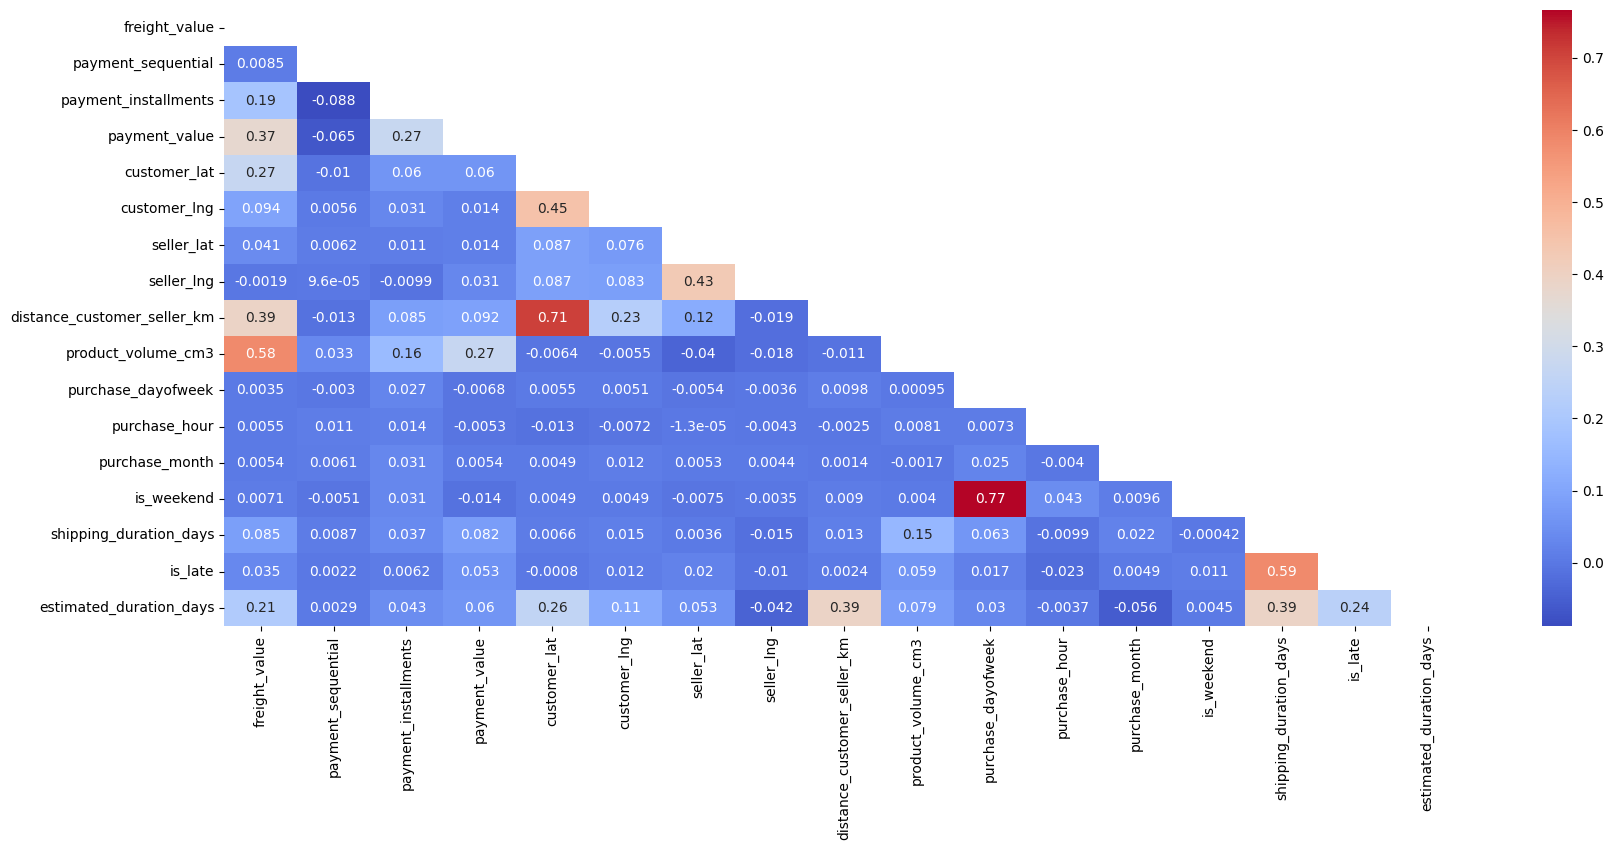

In [32]:
tmp = df_total.drop(['order_status', 'payment_type', 'customer_state', 'seller_state'], axis=1)
tmp_corr = tmp.corr()
mask = np.triu(np.ones_like(tmp_corr, dtype=bool))

plt.figure(figsize=(20, 8))
sns.heatmap(
    data = tmp_corr,
    cmap = 'coolwarm',
    annot = True,
    mask = mask
)
plt.show()

In [33]:
df_total.to_csv("regression_dataset.csv")